In [218]:
import numpy as np
import scipy.stats as stats
import scipy as sp 
import matplotlib.pyplot as plt
import scipy.stats as stats

## question 1 a

In [2]:
p=np.zeros([3,3])
p[0,0]=1
p[1,1]=1/np.sqrt(2)
p[1,2]=1/np.sqrt(2)
p[2,1]=1/np.sqrt(2)
p[2,2]=-1/np.sqrt(2)
eigen_matirx=np.zeros([3,3])
eigen_matirx[0,0]=1
eigen_matirx[1,1]=1/2
print(p,"\n", eigen_matirx)
covariance_matrix=p@eigen_matirx@np.linalg.inv(p)
print(covariance_matrix)

## so only psd

[[ 1.          0.          0.        ]
 [ 0.          0.70710678  0.70710678]
 [ 0.          0.70710678 -0.70710678]] 
 [[1.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]
[[1.   0.   0.  ]
 [0.   0.25 0.25]
 [0.   0.25 0.25]]


## question 1 b and c. 

In [3]:
a=[0,(1/np.sqrt(2)),(1/np.sqrt(2))]
def objective(a):
    a_1, a_2, a_3 = a
    return a_1**2 + 0.25*(a_2**2 + a_3**2) + 0.5*a_2*a_3 
objective(a) ##.5 
a=[1,0,0]
objective(a) ##!1
a=[0,1/np.sqrt(2),1/np.sqrt(2)] ##.66 
print(objective(a) )
a=[0,1/np.sqrt(2),-1/np.sqrt(2)] ##.66 
objective(a) 

0.4999999999999999


0.0

## question 2. 

In [4]:
covariance_matrix=np.zeros([3,3])
covariance_matrix[0,:]=[100,-80,10]
covariance_matrix[1,:]=[-80,81,50]
covariance_matrix[2,:]=[10,50,100]
covariance_matrix

array([[100., -80.,  10.],
       [-80.,  81.,  50.],
       [ 10.,  50., 100.]])

In [5]:
def find_variance(a, covariance_matrix):
    return np.dot(a,covariance_matrix)@a
a=np.array([1,1,0])
print(find_variance(a,covariance_matrix))
a=np.array([1,0,1])
print(find_variance(a,covariance_matrix))
a=np.array([0,1,1])
print(find_variance(a,covariance_matrix))

21.0
220.0
281.0


## question 3a. 

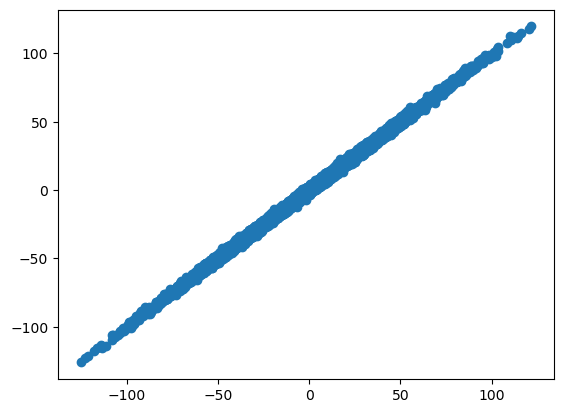

(array([[  21.,  123.,  577., 1558., 2549., 2558., 1689.,  721.,  183.,
           21.],
        [  22.,  121.,  584., 1544., 2550., 2565., 1683.,  732.,  179.,
           20.]]),
 array([-126.11084251, -101.31863934,  -76.52643617,  -51.734233  ,
         -26.94202983,   -2.14982666,   22.64237651,   47.43457968,
          72.22678286,   97.01898603,  121.8111892 ]),
 <a list of 2 BarContainer objects>)

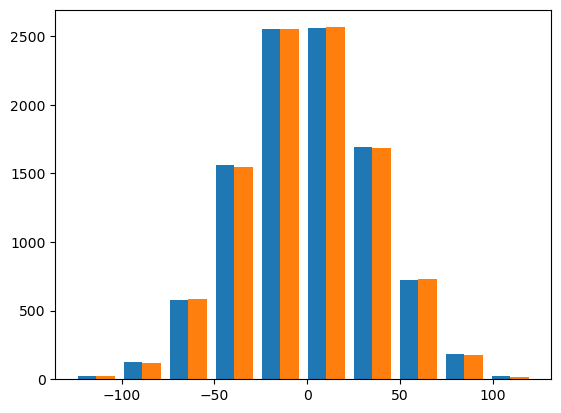

In [6]:
sigma_signal=50
sigma_noise=np.identity(2)*1
x=stats.norm(loc=0, scale=sigma_signal)
z=stats.multivariate_normal(mean=[0,0],cov=sigma_noise)
v=np.array([1/np.sqrt(2),1/np.sqrt(2)])
def y(n):
    ellement_wise_multiply = lambda v,n: np.array([v*x_i for x_i in x.rvs(n)])
    return ellement_wise_multiply(v,n)+z.rvs(size=n)
samples=y(10000)
plt.scatter(samples[:,0],samples[:,1])
plt.show()
plt.hist(samples)


## question 3b. 

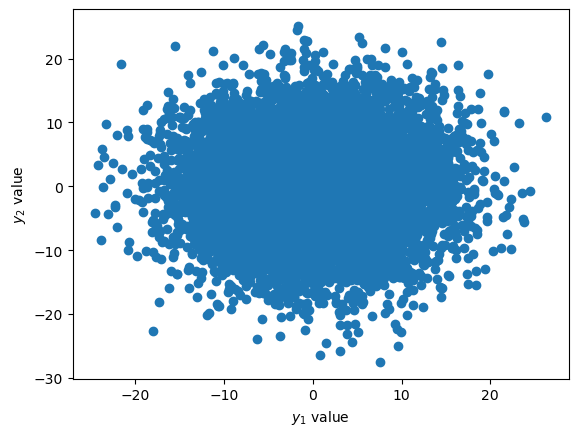

(array([[  12.,   71.,  450., 1456., 2661., 2856., 1712.,  633.,  132.,
           17.],
        [  14.,   78.,  481., 1454., 2657., 2871., 1740.,  581.,  106.,
           18.]]),
 array([-27.50189635, -22.12404061, -16.74618488, -11.36832914,
         -5.9904734 ,  -0.61261766,   4.76523808,  10.14309381,
         15.52094955,  20.89880529,  26.27666103]),
 <a list of 2 BarContainer objects>)

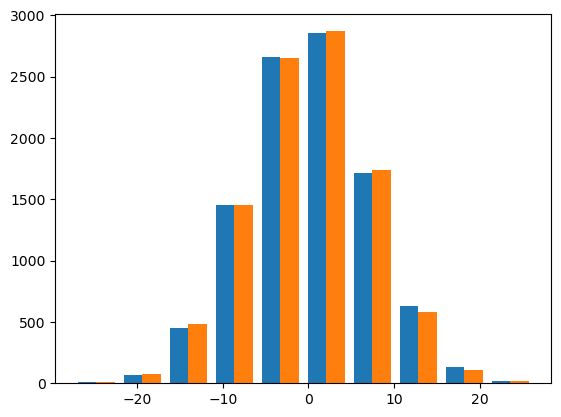

In [7]:
sigma_signal=1
sigma_noise=np.identity(2)*50
x=stats.norm(loc=0, scale=sigma_signal)
z=stats.multivariate_normal(mean=[0,0],cov=sigma_noise)
v=np.array([1/np.sqrt(2),1/np.sqrt(2)])
def y(n):
    ellement_wise_multiply = lambda v,n: np.array([v*x_i for x_i in x.rvs(n)])
    return ellement_wise_multiply(v,n)+z.rvs(size=n)
samples=y(10000)
plt.scatter(samples[:,0],samples[:,1])
plt.xlabel("$y_1$ value")
plt.ylabel("$y_2$ value")
plt.show()
plt.hist(samples)


## question 4. 

In [8]:
from data import findata_tools
df = findata_tools.load_dataframe(r'/home/buzgalbraith/work/school/spring_2023/probaility-theroy-2-2023/homework_code/homework_8/data/stockprices.csv')

In [12]:
def center_data(df):
    center_data=df.copy()
    for col in df.columns:
        center_data[col]=df[col]-np.mean(df[col])
    return center_data
centerd_data=center_data(df)


-2.730584554976459e-14
3.3607194522787186e-14
0.0
5.881259041487758e-14
-1.1421195013603458e-14
0.0
-5.251124144185498e-16
5.251124144185498e-16
2.310494623441619e-14
6.301348973022598e-15
-8.401798630696797e-15
-6.563905180231872e-15
1.3127810360463744e-14
-3.6757869009298485e-14
3.281952590115936e-15
0.0
2.625562072092749e-15
-9.189467252324622e-16


In [153]:
def sample_mean(x):
    out=0
    for x_i in x:
        out=out+x_i
    return out/len(x)
def sample_variance(x):
    inner_term=x-sample_mean(x)
    return sample_mean(inner_term**2)
def sample_covariance(x,y):
    out=0
    expected_x=sample_mean(x)
    expected_y=sample_mean(y)
    for i in range(len(x)):
        out+=(x[i]-expected_x)*(y[i]-expected_y)
    return out/(len(x)-1)
def sample_covariance_matrix(D):
    covariance_matrix=[]
    for x in D:
        temp=[]
        for y in D:
            temp.append(sample_covariance(D[x],D[y]))
        covariance_matrix.append(temp)
    return np.array(covariance_matrix)
covariance_matrix=sample_covariance_matrix(centerd_data)

In [179]:
eigen_values, eigen_vectors=np.linalg.eig(covariance_matrix)
eigen_values.shape
top_2=np.argsort(eigen_values)[-2:]
top_2_eigenvalues=eigen_values[top_2]
top_2_eigenvectors=eigen_vectors[:,top_2]
print(top_2_eigenvectors.shape)

(18, 2)


array([ 0.07473096, -0.31940053,  0.0298182 ,  0.89444772,  0.01896373,
       -0.10656011,  0.03328196,  0.07637155,  0.07705587,  0.04422204,
        0.17095142,  0.12082269,  0.00323408,  0.10825956,  0.01396869,
        0.08597407, -0.04161346, -0.00728756])

In [223]:
indecies=np.argsort(top_2_eigenvectors[:,0])[-2:]
top_2_coeficents=centerd_data.values[0,:][indecies]
top_2_companies=centerd_data.columns[np.argsort(top_2_eigenvectors[:,0])]
findata_tools.pretty_print_latex(top_2_eigenvectors[:,0],df.columns)

\begin{center}
\begin{tabular}{c|c|c|c|c|c}
AAPL & AMZN & MSFT & GOOG & XOM & APC\\
-0.0017 & -0.1677 & -0.0881 & 0.0273 & -0.1187 & -0.6221\\
\hline
CVX & C & GS & JPM & AET & JNJ\\
-0.1469 & 0.3501 & 0.0950 & -0.0074 & 0.1215 & 0.5089\\
\hline
DGX & SPY & XLF & SSO & SDS & USO\\
-0.0340 & 0.0194 & 0.0822 & 0.0343 & -0.0513 & -0.3511\\
\end{tabular}
\end{center}


In [224]:
indecies=np.argsort(top_2_eigenvectors[:,1])[-2:]
top_2_coeficents=centerd_data.values[0,:][indecies]
top_2_companies=centerd_data.columns[np.argsort(top_2_eigenvectors[:,0])]
findata_tools.pretty_print_latex(top_2_eigenvectors[:,1],df.columns)

\begin{center}
\begin{tabular}{c|c|c|c|c|c}
AAPL & AMZN & MSFT & GOOG & XOM & APC\\
-0.2615 & -0.2632 & -0.2753 & -0.2730 & -0.1138 & -0.1009\\
\hline
CVX & C & GS & JPM & AET & JNJ\\
-0.2414 & -0.2276 & -0.1361 & -0.2734 & -0.2721 & -0.1669\\
\hline
DGX & SPY & XLF & SSO & SDS & USO\\
-0.1354 & -0.2819 & -0.2701 & -0.2814 & 0.2802 & -0.2350\\
\end{tabular}
\end{center}


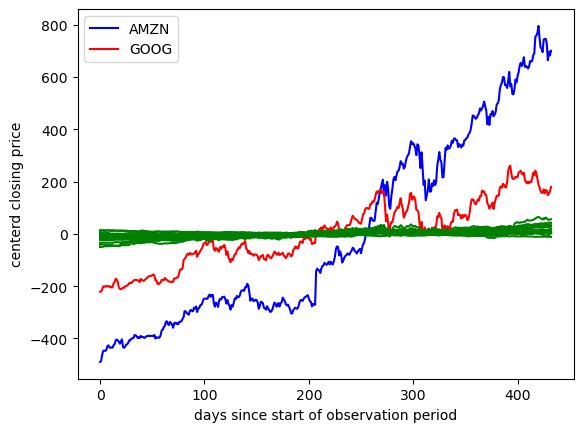

In [225]:
i=range(centerd_data.shape[0])
for col in centerd_data:
    if(col =="GOOG"):
        plt.plot(i, centerd_data[col], color="r",label=col)
    elif(col=="AMZN"):
        plt.plot(i, centerd_data[col], color="b",label=col)
    else:
        plt.plot(i, centerd_data[col], color="g")
plt.legend()
plt.xlabel("days since start of observation period")
plt.ylabel("centerd closing price")
plt.show()

In [193]:
def standardize_data(true_data):
    data=true_data.copy()
    for col in data:
        data[col]=( data[col] - sample_mean(data[col]) ) / np.sqrt(sample_variance(data[col]))
    return data
standardized_data=standardize_data(centerd_data)
corelation_matrix=sample_covariance_matrix(standardized_data)

In [194]:
eigen_values, eigen_vectors=np.linalg.eig(corelation_matrix)
eigen_values.shape
top_2=np.argsort(eigen_values)[-2:]
top_2_eigenvalues=eigen_values[top_2]
top_2_eigenvectors=eigen_vectors[:,top_2]
top_2_eigenvectors.shape

(18, 2)

In [226]:
indecies=np.argsort(top_2_eigenvectors[:,0])[-2:]
top_2_coeficents=centerd_data.values[0,:][indecies]
top_2_companies=centerd_data.columns[np.argsort(top_2_eigenvectors[:,0])]
findata_tools.pretty_print_latex(top_2_eigenvectors[:,0],df.columns)

\begin{center}
\begin{tabular}{c|c|c|c|c|c}
AAPL & AMZN & MSFT & GOOG & XOM & APC\\
-0.0017 & -0.1677 & -0.0881 & 0.0273 & -0.1187 & -0.6221\\
\hline
CVX & C & GS & JPM & AET & JNJ\\
-0.1469 & 0.3501 & 0.0950 & -0.0074 & 0.1215 & 0.5089\\
\hline
DGX & SPY & XLF & SSO & SDS & USO\\
-0.0340 & 0.0194 & 0.0822 & 0.0343 & -0.0513 & -0.3511\\
\end{tabular}
\end{center}


In [227]:
indecies=np.argsort(top_2_eigenvectors[:,1])[-2:]
top_2_coeficents=centerd_data.values[0,:][indecies]
top_2_companies=centerd_data.columns[np.argsort(top_2_eigenvectors[:,0])]
findata_tools.pretty_print_latex(top_2_eigenvectors[:,1],df.columns)

\begin{center}
\begin{tabular}{c|c|c|c|c|c}
AAPL & AMZN & MSFT & GOOG & XOM & APC\\
-0.2615 & -0.2632 & -0.2753 & -0.2730 & -0.1138 & -0.1009\\
\hline
CVX & C & GS & JPM & AET & JNJ\\
-0.2414 & -0.2276 & -0.1361 & -0.2734 & -0.2721 & -0.1669\\
\hline
DGX & SPY & XLF & SSO & SDS & USO\\
-0.1354 & -0.2819 & -0.2701 & -0.2814 & 0.2802 & -0.2350\\
\end{tabular}
\end{center}


## question 4c. 

In [213]:
def stock_risk(data, alpha):
    data=center_data(data)
    covariance_matrix=sample_covariance_matrix(data)
    return np.dot(alpha,covariance_matrix )@alpha
alpha=np.ones((1,18)).flatten()*100
alpha[:4]=alpha[:4]*2
stock_risk(df, alpha)


12554439583.358356

## question 4d. 

In [222]:
data=center_data(df)
covariance_matrix=sample_covariance_matrix(data)
variance=alpha.T@covariance_matrix@alpha
y=stats.norm(loc=0,scale=variance)
(1-y.cdf(-1000))*100

50.00000317769884